In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pingouin as pg
sns.set_style("whitegrid")

Our scenario is imaginary, so we generate sales data randomly. Let's consider a DataFrame that has Sales_wout_ad (variant A) and Sales_with_ad (variant B) columns, made with a NumPy function to create normally distributed data. After data generation, we calculate the differences between Sales_wout_ad and Sales_with_ad.

In [11]:
np.random.seed(951)

df= pd.DataFrame(data={
    "sales_wout_ad":np.random.normal(loc=27, scale=5, size=10),
    "sales_with_ad": np.random.normal(loc=31, scale=10, size=10) 
})
df["difference_in_sale"] = df["sales_with_ad"] - df["sales_wout_ad"]
df.describe()

,sales_wout_ad,sales_with_ad,difference_in_sale
count,10.000000,10.000000,10.000000
mean,26.671784,28.161791,1.490008
std,4.257854,10.934418,12.027098
min,20.086143,14.691851,-12.834766
25%,24.052342,18.288519,-7.818175
50%,28.023639,27.979045,0.592895
75%,29.533606,34.937466,9.141159
max,32.130923,45.421873,24.896957


data is not normally distributed

In [9]:
pg.normality(data=df, alpha=0.05)

,W,pval,normal
sales_wout_ad,0.921534,0.369930,True
sales_with_ad,0.932653,0.474490,True
difference_in_sale,0.940788,0.561816,True


data is normally distributed

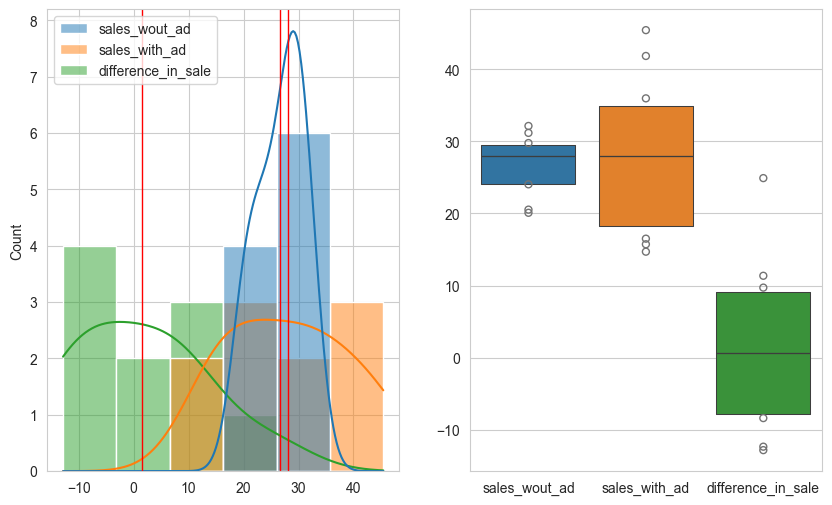

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.histplot(data=df, kde=True, ax=axes[0])
for col in df.columns:
    axes[0].axvline(df[col].mean(), linestyle="-", linewidth=1, c="r")
sns.boxenplot(data=df, ax=axes[1])
plt.show()

to get the sample size 8 * std().sqd / mean().sqd - in our case, we're considering the std and mean of the third column - difference

In [15]:
n_minimal = 8 * (12.027098)/(1.490008)
n_minimal

64.57467610912157

sample size should be 65.

the sample size indicates that we need at least 65 days to test how each variable functions(with and without ad)... in total we need 130 days worth data before making a decision - 130 becuase 65 with ad, and 65 without. I will take 20 more samples to be careful

In [43]:
pg.ttest(x=df["difference_in_sale"], y=0, alternative="greater")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.391767,9,greater,0.352173,"[-5.48, inf]",0.123888,0.66,0.099974


In [26]:
size = 150
df1 = pd.DataFrame(data={
    "sales_wout_ad": np.random.normal(loc=27, scale=5, size=size),
    "sales_with_ad": np.random.normal(loc=31, scale=10, size=size)
})
df1["diff_in_sales"] = df1["sales_with_ad"] - df1["sales_wout_ad"]
df1.describe()

,sales_wout_ad,sales_with_ad,diff_in_sales
count,150.000000,150.000000,150.000000
mean,27.121671,30.531246,3.409576
std,5.139749,9.598826,10.851927
min,13.176362,6.160288,-22.533274
25%,23.973804,23.993396,-3.935352
50%,27.114746,30.862624,2.544698
75%,29.923664,35.802781,11.472241
max,41.040947,62.552833,37.931469


In [20]:
pg.normality(data=df1, alpha=0.05)

,W,pval,normal
sales_wout_ad,0.989751,0.3449,True
sales_with_ad,0.989751,0.3449,True
diff_in_sales,0.989751,0.3449,True


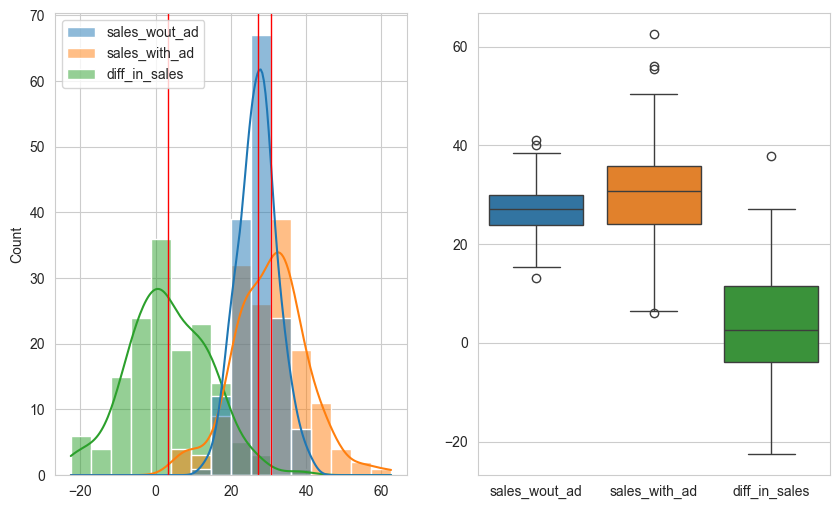

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.histplot(data=df1, kde=True, ax=axes[0])
for col in df1.columns:
    axes[0].axvline(df1[col].mean(), linestyle="-", linewidth=1, c="r")
sns.boxplot(data=df1, ax=axes[1])
plt.show()

In [28]:
pg.ttest(df1["sales_wout_ad"], df1["sales_with_ad"])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.835191,298,two-sided,0.000153,"[-5.16, -1.66]",0.44285,125.808,0.968757


**watchout for how you perform calculation**

now the p-val increased... remember how you caluclate the difference column... i earlier deducted sales without ad(less) from sales with ad(more)... it should ideally be: sales with ad(more) deducted from sales wihout ad(less)

also I used the wrong sign earlier: = instead of -

this is why it's not enough for data to make just statistical sense, but should be practical too... how can the mean be the same when i'm assigning a random value of 27 and 31, and the scales are quite different too. before writing the old pval i had to be careful

In [30]:
pg.ttest(x=df1["diff_in_sales"], y=0, alternative="greater")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.848036,149,greater,0.000088,"[1.94, inf]",0.314191,186.734,0.985579


In [39]:
df1["diff_in_sales"].describe()

count    150.000000
mean       3.409576
std       10.851927
min      -22.533274
25%       -3.935352
50%        2.544698
75%       11.472241
max       37.931469
Name: diff_in_sales, dtype: float64

In [40]:
print(df1["diff_in_sales"].mean())

3.409575725988448


In [42]:
pg.ttest(x=df1["diff_in_sales"], y=0).loc["T-test", "CI95%"]

array([1.66, 5.16])